# Train script for Hybrid VAE model

### imports

In [1]:
%matplotlib inline

from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
import torch

import sys
sys.path.append("../Modules")
sys.path.append("../ToyDatasets")

# local imports
from train import train
from helpers import kl_loss,nll_loss,mse_loss,kl_loss_multi
from models import HybridVAE
from timeSeries import Sinusoids

## Define dataset loader

In [2]:
batch_size = 256
num_steps = 16
dataset_size = 5000
num_classes = 10

data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)
valid_data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)

batch_loader = iter(data_loader)
valid_batch_loader = iter(valid_data_loader)

## Define model

In [3]:
model = HybridVAE(input_size=1,conv_size=256,rnn_size=256,latent_size=64,output_size=num_classes,use_softmax=True)
print("Number of trainable parameters {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# test forward pass
try:
    initial_batch = batch_loader.next()
    x = Variable(initial_batch).type(torch.FloatTensor).transpose(1,0)
    test,_ = model(x)
    assert (test.shape[0] == x.shape[0] and test.shape[1] == x.shape[1] and test.shape[2] == num_classes)
    print("Forward pass succesfull")
except:
    print("Error in forward pass. Output should have shape: {} but had {}".format(x.contiguous().view(-1).shape,test.view(-1).shape))

Number of trainable parameters 600660
Forward pass succesfull


## Define optimizer and loss

In [4]:
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.5,verbose=True,cooldown=5)

## Run trainer


Train (100 10%) loss: 2.3245 r_loss: 1.7769 kl: 94.4037 aux_loss: 1.6680
Valid (100 10%) loss: 2.2825 r_loss: 1.7392 kl: 98.6244 aux_loss: 1.6464

Train (200 20%) loss: 1.7721 r_loss: 1.3396 kl: 124.3387 aux_loss: 1.2346
Valid (200 20%) loss: 1.8328 r_loss: 1.3819 kl: 122.1575 aux_loss: 1.2993

Train (300 30%) loss: 1.3247 r_loss: 0.9789 kl: 180.0670 aux_loss: 0.8526
Valid (300 30%) loss: 1.3167 r_loss: 0.9731 kl: 182.2329 aux_loss: 0.8415

Train (400 40%) loss: 1.0445 r_loss: 0.7448 kl: 204.8197 aux_loss: 0.6576
Valid (400 40%) loss: 1.0294 r_loss: 0.7310 kl: 207.3734 aux_loss: 0.6490

Train (500 50%) loss: 1.0978 r_loss: 0.6941 kl: 83.7111 aux_loss: 0.6480
Valid (500 50%) loss: 1.0857 r_loss: 0.6781 kl: 85.5721 aux_loss: 0.6458

Train (600 60%) loss: 1.1340 r_loss: 0.6801 kl: 55.7831 aux_loss: 0.6760
Valid (600 60%) loss: 1.1300 r_loss: 0.6802 kl: 56.2803 aux_loss: 0.6551

Train (700 70%) loss: 1.1397 r_loss: 0.6560 kl: 43.6671 aux_loss: 0.6660
Valid (700 70%) loss: 1.1587 r_loss: 0

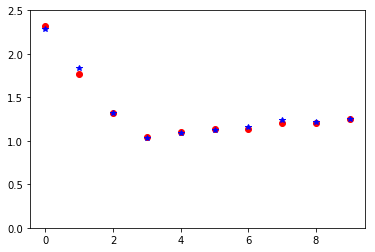

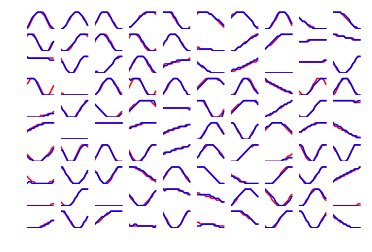

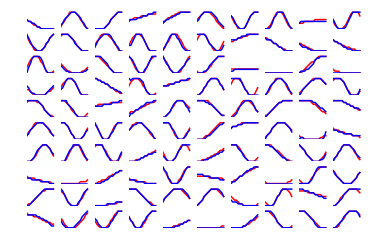

In [6]:
# use at least 50 iterations to get good results
train(data_loader,dataset_size,valid_batch_loader,model,optimizer,scheduler,nll_loss,kl_loss,n_iters=50,use_softmax=True,print_every=1)

In [7]:
#torch.save(model.state_dict(),"Saved_models/HybridVAE_nll.pt")